# Establish Pisces baseline by loading data, making triplots

In [1]:

import numpy as np
from analyses.NHRC.nhrc_utils.analysis import DEFAULT_EVALUATION_DIR, SCENARIOS, STATIONARY_LOWER, HYBRID_LOWER
import matplotlib.pyplot as plt
from analyses.NHRC.nhrc_utils.analysis import ACCURACY_COLUMN, AUROC_COLUMN, MODEL_COLUMN, SCENARIO_COLUMN, SLEEP_ACCURACY_COLUMN, WASA_COLUMN
from analyses.NHRC.nhrc_utils.plotting import tri_plot_metrics
from analyses.NHRC.nhrc_utils.model_definitions import EXTRA_LAYERS_NAME, EXTRA_LOWER, LR_LOWER, NAIVE_LOWER
from collections import defaultdict
from analyses.NHRC.nhrc_utils.analysis import compute_evaluations_df


import pandas as pd

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  # Set this before importing TensorFlow
import tensorflow as tf
tf.get_logger().setLevel('ERROR')

from analyses.NHRC.nhrc_utils.analysis import DF_COLUMNS, WASA_SLEEP_ACCURACY, auroc_balaccuracy_wasa

acc_hz_string = "dyn"
WASA_SLEEP_PERCENT = 95
STATIONARY_SET_NAME = "Stationary Data"
HYBRID_SET_NAME = "Hybrid Data"
SECOND_LINE = f"Sleep Accuracy ≈ {WASA_SLEEP_PERCENT}%"
SECOND_TITLE_LINE = f"Comparison of Stationary and Hybrid Data Metrics, {SECOND_LINE}"
TRIPLOT_DPI = 300

scenarios = SCENARIOS

LR_KERNEL_SIZE: 61


In [2]:
from collections import defaultdict
from analyses.NHRC.nhrc_utils.analysis import prepare_data

sets_prepro_data = defaultdict(dict)


for set_name in scenarios:
    print("Loading", set_name)
    sets_prepro_data[set_name] = np.load(f'./pre_processed_data/{set_name}/{set_name}_preprocessed_data_{acc_hz_string}.npy', allow_pickle=True).item()

stationary_data_bundle = prepare_data(sets_prepro_data['stationary'])
hybrid_data_bundle = prepare_data(sets_prepro_data['hybrid'])

Loading stationary
Loading hybrid
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


In [3]:


# rev_sets = reverse_dicts(rev_sets_prepro)
walch_keys = list(sets_prepro_data['stationary'].keys())

cnn_predictors = [
    tf.keras.models.load_model(f"/Users/eric/Engineering/Work/pisces/analyses/NHRC/evaluations/models/finetuning_{i}.keras")
    for i in walch_keys 
]

lr_predictors = [
    tf.keras.models.load_model(f"/Users/eric/Engineering/Work/pisces/analyses/NHRC/evaluations/models/lr_{i}.keras")
    for i in walch_keys 
]


/Users/eric/Engineering/Work/pisces/analyses/NHRC/nhrc_utils/analysis.py:329: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  evaluations_df = pd.concat([evaluations_df,


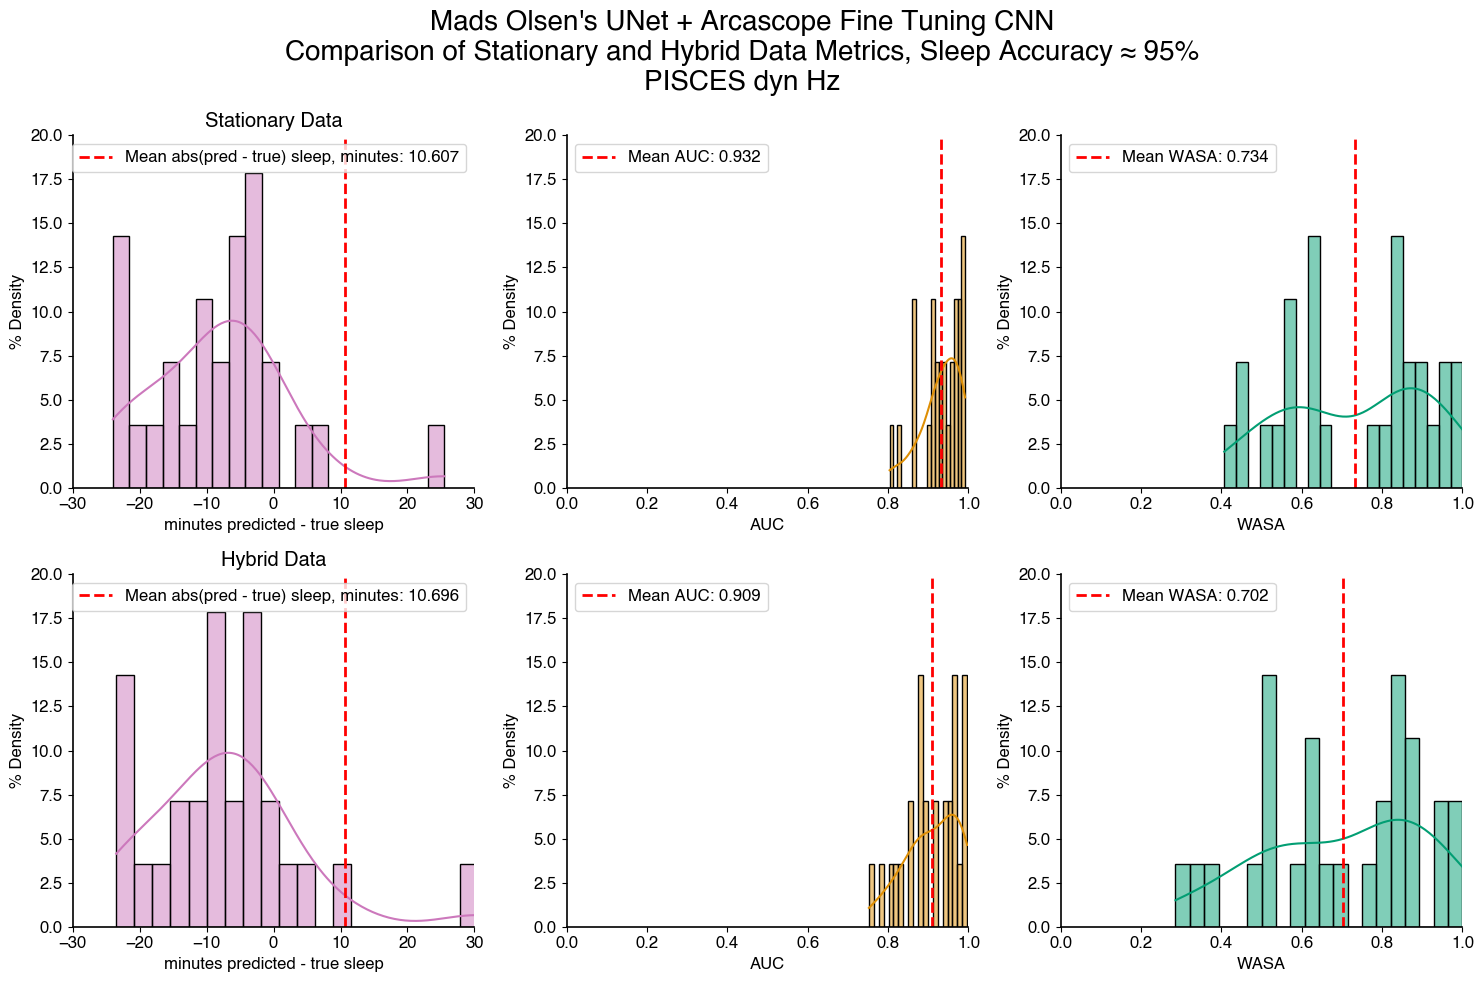

In [4]:



evaluations_df = compute_evaluations_df(
    walch_keys,
    stationary_data_bundle,
    hybrid_data_bundle,
    lr_predictors,
    cnn_predictors
)

fig, axs = plt.subplots(2, 3, figsize=(15, 10))

cnn_evaluations_df = evaluations_df[evaluations_df[MODEL_COLUMN] == EXTRA_LOWER]
cnn_evaluations_df = cnn_evaluations_df[cnn_evaluations_df[SLEEP_ACCURACY_COLUMN] == WASA_SLEEP_PERCENT]
cnn_stationary = cnn_evaluations_df[cnn_evaluations_df[SCENARIO_COLUMN] == STATIONARY_LOWER]
cnn_hybrid = cnn_evaluations_df[cnn_evaluations_df[SCENARIO_COLUMN] == HYBRID_LOWER]

for ax in axs.flatten():
    ax.set_ylim(0, 20)

tri_plot_metrics(evaluations_df=cnn_stationary, axs=axs[0], axs_set_name=STATIONARY_SET_NAME,
                 wasa_column=WASA_COLUMN, accuracy_column=ACCURACY_COLUMN, auroc_column=AUROC_COLUMN)
tri_plot_metrics(cnn_hybrid, axs=axs[1], axs_set_name=HYBRID_SET_NAME,
                 wasa_column=WASA_COLUMN, accuracy_column=ACCURACY_COLUMN, auroc_column=AUROC_COLUMN)


fig.suptitle(f"Mads Olsen's UNet + Arcascope {EXTRA_LAYERS_NAME} CNN\n{SECOND_TITLE_LINE}\nPISCES {acc_hz_string} Hz", fontsize=20)

fig.tight_layout()
fig.savefig(DEFAULT_EVALUATION_DIR.joinpath(f"{EXTRA_LOWER}_triplot_{WASA_SLEEP_PERCENT}_{acc_hz_string}.png"), dpi=TRIPLOT_DPI, bbox_inches='tight')

In [5]:
acc_hz_string = "50"
sets_prepro_data = defaultdict(dict)


for set_name in scenarios:
    print("Loading", set_name)
    sets_prepro_data[set_name] = np.load(f'./pre_processed_data/{set_name}/{set_name}_preprocessed_data_{acc_hz_string}.npy', allow_pickle=True).item()

stationary_data_bundle_50 = prepare_data(sets_prepro_data['stationary'])
hybrid_data_bundle_50 = prepare_data(sets_prepro_data['hybrid'])

evaluations_df_50 = compute_evaluations_df(
    walch_keys,
    stationary_data_bundle_50,
    hybrid_data_bundle_50,
    lr_predictors,
    cnn_predictors
)

Loading stationary
Loading hybrid
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


/Users/eric/Engineering/Work/pisces/analyses/NHRC/nhrc_utils/analysis.py:329: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  evaluations_df = pd.concat([evaluations_df,


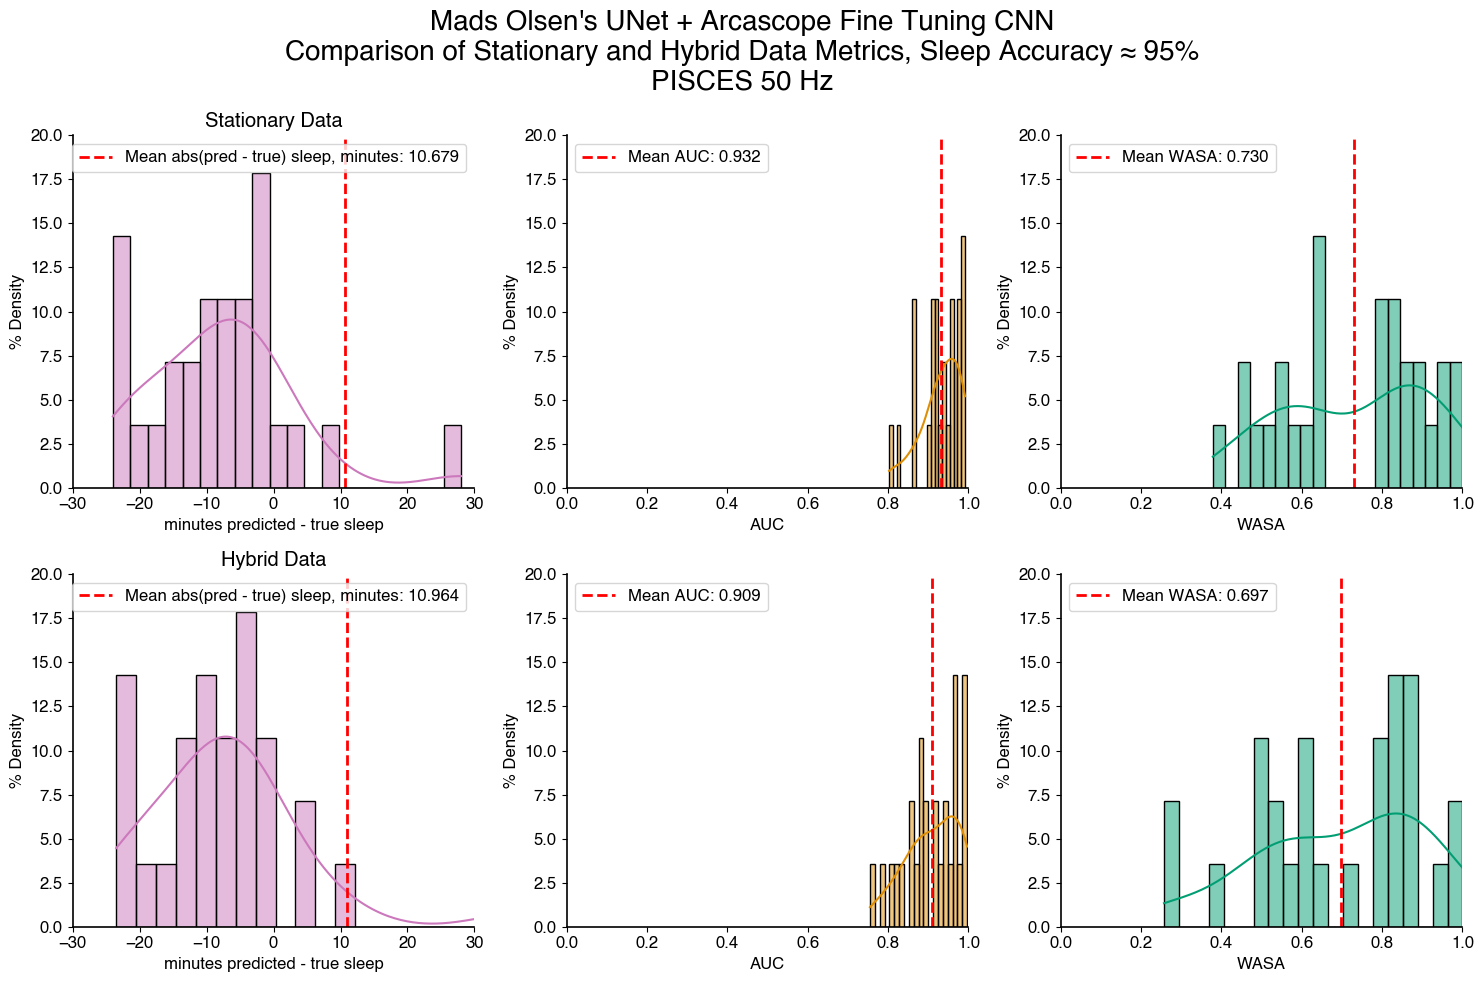

In [6]:

fig, axs = plt.subplots(2, 3, figsize=(15, 10))

cnn_evaluations_df = evaluations_df_50[evaluations_df_50[MODEL_COLUMN] == EXTRA_LOWER]
cnn_evaluations_df = cnn_evaluations_df[cnn_evaluations_df[SLEEP_ACCURACY_COLUMN] == WASA_SLEEP_PERCENT]
cnn_stationary = cnn_evaluations_df[cnn_evaluations_df[SCENARIO_COLUMN] == STATIONARY_LOWER]
cnn_hybrid = cnn_evaluations_df[cnn_evaluations_df[SCENARIO_COLUMN] == HYBRID_LOWER]

for ax in axs.flatten():
    ax.set_ylim(0, 20)

tri_plot_metrics(evaluations_df=cnn_stationary, axs=axs[0], axs_set_name=STATIONARY_SET_NAME,
                 wasa_column=WASA_COLUMN, accuracy_column=ACCURACY_COLUMN, auroc_column=AUROC_COLUMN)
tri_plot_metrics(cnn_hybrid, axs=axs[1], axs_set_name=HYBRID_SET_NAME,
                 wasa_column=WASA_COLUMN, accuracy_column=ACCURACY_COLUMN, auroc_column=AUROC_COLUMN)


fig.suptitle(f"Mads Olsen's UNet + Arcascope {EXTRA_LAYERS_NAME} CNN\n{SECOND_TITLE_LINE}\nPISCES {acc_hz_string} Hz", fontsize=20)

fig.tight_layout()
fig.savefig(DEFAULT_EVALUATION_DIR.joinpath(f"{EXTRA_LOWER}_triplot_{WASA_SLEEP_PERCENT}_{acc_hz_string}.png"), dpi=TRIPLOT_DPI, bbox_inches='tight')

In [7]:
from collections import defaultdict
from pathlib import Path

import matplotlib.pyplot as plt

from analyses.NHRC.nhrc_utils.analysis import SCENARIOS


specgram_folder = Path('/Users/eric/Engineering/Work/pisces/data_sets/specgrams')

specgram_data = defaultdict(dict)

scenarios = SCENARIOS
print(scenarios)

for file in specgram_folder.joinpath('NSR').glob('*.npy'):
    scenario, subject_id = file.stem.split('_')[:2]
    specgram_data[scenario][subject_id] = np.squeeze(np.load(file, allow_pickle=True))

['stationary', 'hybrid']


In [8]:
specgram_data.keys()

dict_keys(['hybrid', 'stationary'])

In [9]:
keys = sorted(list(specgram_data['stationary'].keys()))

In [10]:
print(keys)

['1066528', '1360686', '1449548', '1455390', '1818471', '2598705', '2638030', '3509524', '3997827', '4018081', '4314139', '4426783', '46343', '5132496', '5383425', '5498603', '5797046', '6220552', '759667', '781756', '8000685', '8173033', '8258170', '844359', '8530312', '8686948', '8692923', '9106476', '9618981', '9961348']


In [11]:
nsr_stationary = np.array([specgram_data['stationary'][subject_id] for subject_id in keys])
nsr_hybrid = np.array([specgram_data['hybrid'][subject_id] for subject_id in keys])

# Load and compare direct pipeline exports from NSR
We are going to directly re-analyze the different steps of `NavySleepResearch`.
1. Take NSR spectrograms, export those. Feed those into Pisces Keras model.
2. Take NSR staging predictions, comptued from NSR specgrams using NSR's TF Lite exported Keras. (A float16 model)
3. Compare WASA etc using masked PSG from NSR, and PSG as we mask it now.

In [125]:
rec_0_input = np.load('/Users/eric/Engineering/Work/pisces/data_sets/first_record_inputs.npy', allow_pickle=True)
rec_0_input_spec = rec_0_input[0, :, :, 0]
rec_0_pred = np.load('/Users/eric/Engineering/Work/pisces/data_sets/first_record_preds.npy', allow_pickle=True)
rec_0_psg = np.load("/Users/eric/Engineering/Work/pisces/data_sets/first_record_psg.npy", allow_pickle=True)

In [126]:
rec_0_input_spec.shape, rec_0_input.shape, rec_0_psg.shape

((15360, 32), (1, 15360, 32, 2), (1024,))

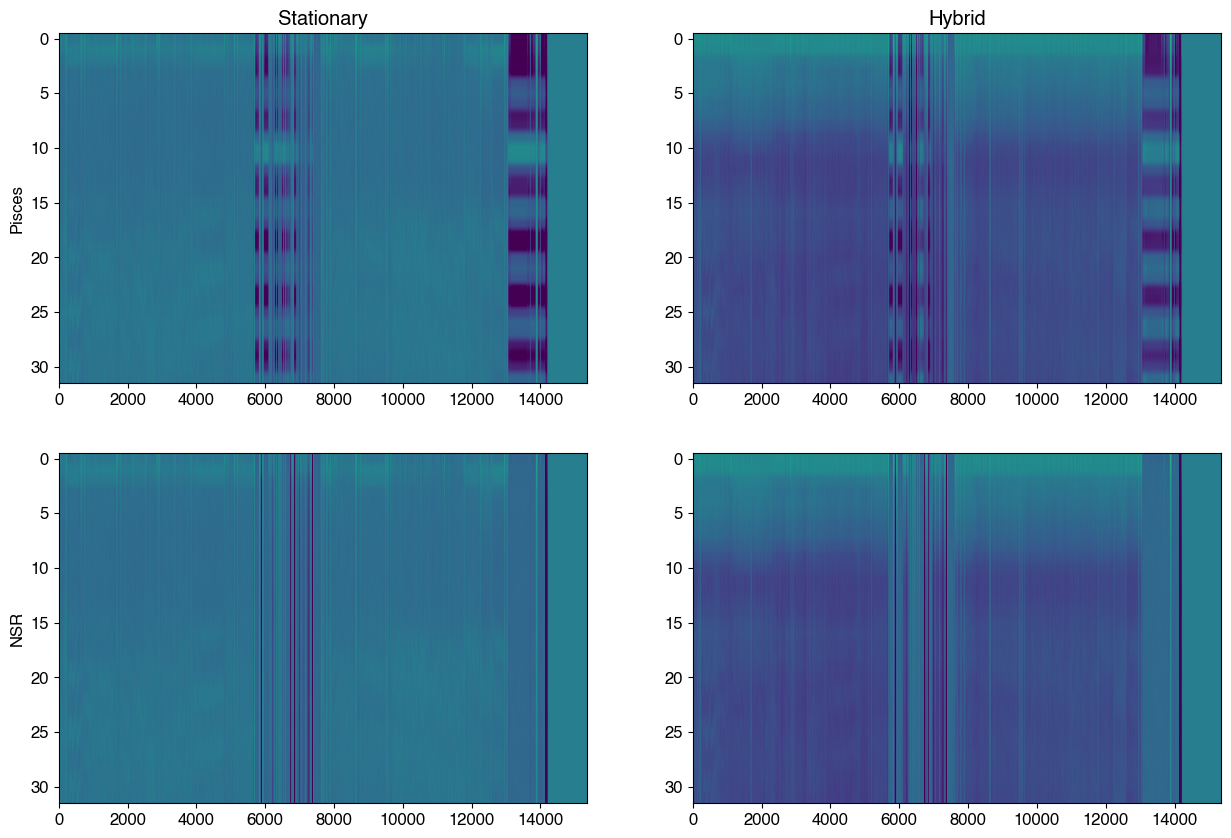

In [128]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10))
datas = [
    [stationary_data_bundle.spectrogram[0], hybrid_data_bundle.spectrogram[0]],
    [rec_0_input_spec, nsr_hybrid[0]]
]


for row in range(2):
    for col in range(2):
        array = np.squeeze(datas[row][col])
        ax[row][col].imshow(array.T, aspect='auto', vmin=-15, vmax=20)
        ax[0][col].set_title(['Stationary', 'Hybrid'][col])
    ax[row][0].set_ylabel(['Pisces', 'NSR'][row])

In [129]:
from pisces.models import load_saved_keras

mo = load_saved_keras()

nsr_2_pisces_pred = mo.predict(rec_0_input)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 491ms/step


In [130]:
nsr_2_pisces_pred.shape

(1, 1024, 4)

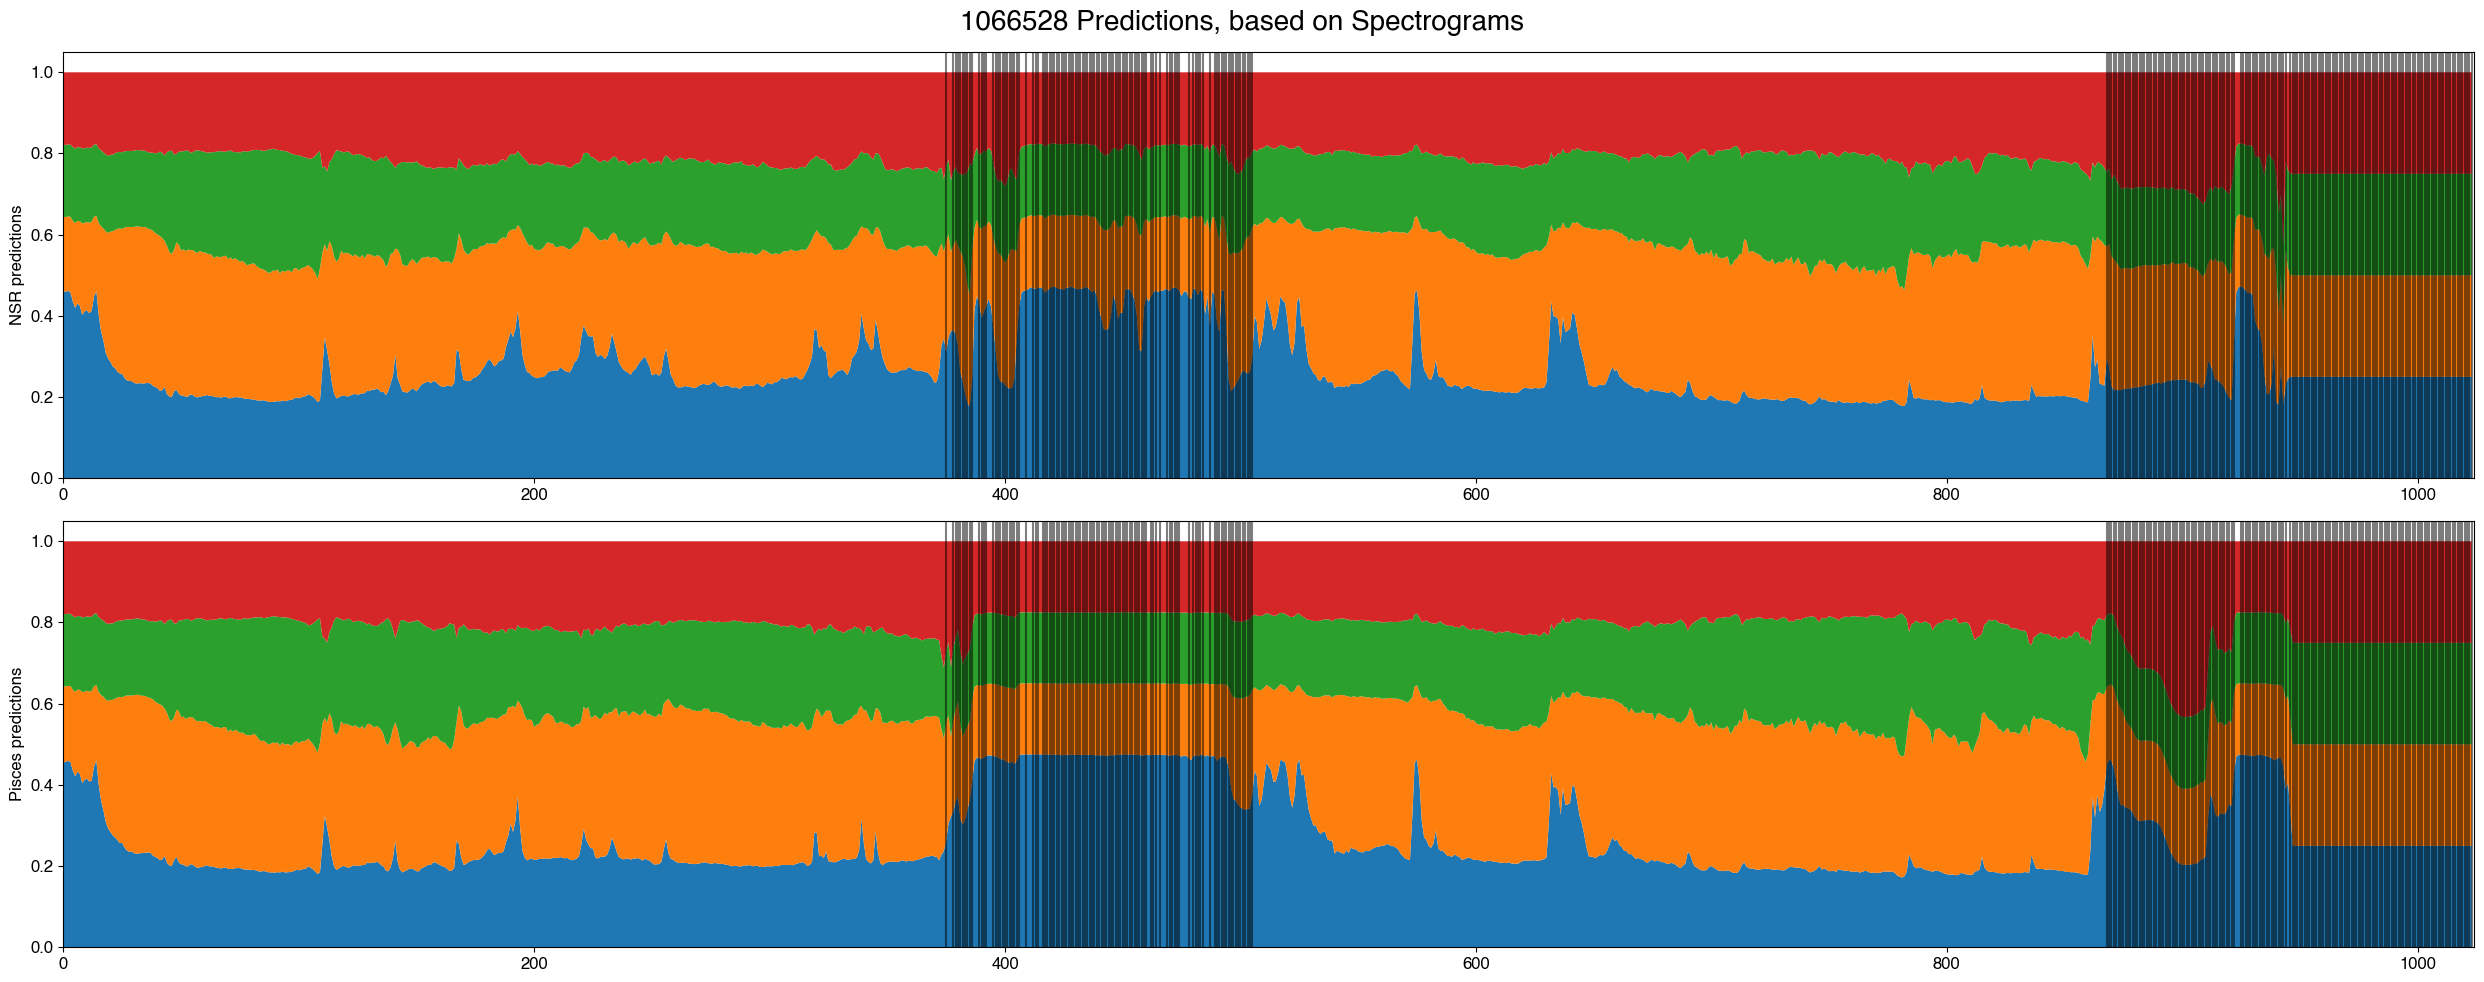

In [131]:
from scipy.special import softmax
fig, axes = plt.subplots(2, 1, figsize=(25, 10))

softmax_nsr = softmax(rec_0_pred, axis=-1).T
softmax_pisces = softmax(stationary_data_bundle.mo_predictions[0], axis=-1).T

axes[0].stackplot(range(1024), softmax_nsr)
axes[0].set_ylabel("NSR predictions")
axes[1].stackplot(range(1024), softmax_pisces)
axes[1].set_ylabel("Pisces predictions")
fig.suptitle(f"{walch_keys[0]} Predictions, based on Spectrograms", fontsize=20)
fig.tight_layout()

masks = stationary_data_bundle.sample_weights[0] == 0
mask_times = np.where(masks)[0]

for ax in axes:
    ax.set_xlim(0, 1024)
    for mask_time in mask_times:
        ax.axvline(mask_time, color='black', alpha=0.5)

(0.0, 1024.0)

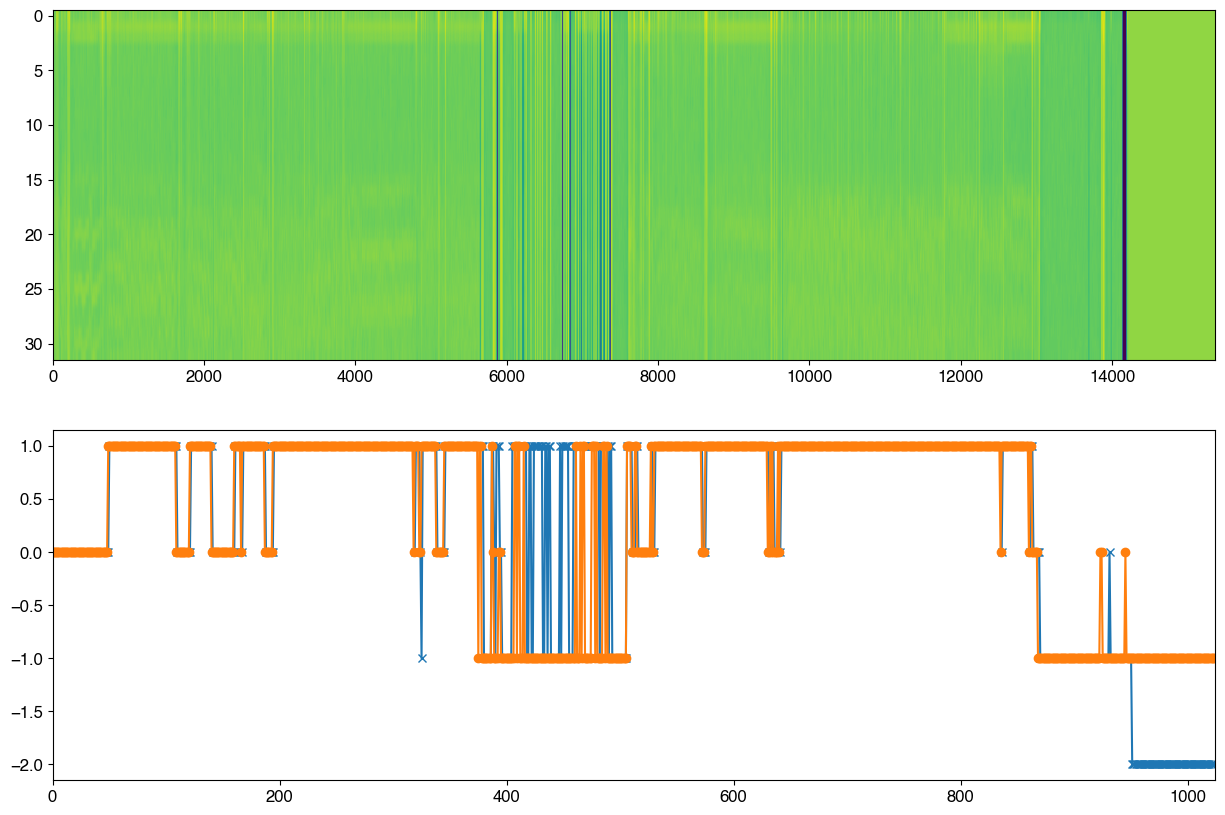

In [132]:
fig, ax = plt.subplots(2, 1, figsize=(15, 10))
ax[0].imshow(rec_0_input_spec.T, aspect='auto')
ax[1].plot(rec_0_psg, 'x-', label='NSR')
ax[1].plot(stationary_data_bundle.true_labels[0], 'o-', label='Pisces')
ax[1].set_xlim(0, 1024)

# ITS THE FRIGGIN WEIGHTS
Skip the REM, $$$

Looking at the masking above, we see that there's a big segment of REM sleep in the middle that has been totally masked out in Pisces PSG preprocessing. This remains scored in NSR. 

Below we will compute sample weights using NSR -exported PSG, along with Pisces preprocessed PSG. We see the 2 VERY different scores come out of applying the WASA algorithm to the SAME predictions.

In [120]:
from analyses.NHRC.nhrc_utils.analysis import compute_sample_weights

rec_0_psg = np.load("/Users/eric/Engineering/Work/pisces/data_sets/first_record_psg.npy", allow_pickle=True)

rec_0_psg[rec_0_psg < 0] = -1
nsr_weights = compute_sample_weights(rec_0_psg)
rec_0_psg[rec_0_psg < 0] = 0
naive_nsr = 1 - softmax_nsr[0, :]

wasa_threshold = 0.544

y_guess = naive_nsr >= wasa_threshold
guess_right = y_guess == rec_0_psg
y_wake = (rec_0_psg == 0) & (nsr_weights > 0)
y_sleep = (rec_0_psg == 1) & (nsr_weights > 0)
n_wake = np.sum(y_wake)
n_sleep = np.sum(y_sleep)
n_wake_right = np.sum(y_wake & guess_right)
wake_accuracy = n_wake_right / n_wake

n_sleep_right = np.sum(y_sleep & guess_right)
sleep_accuracy = n_sleep_right / n_sleep
print(f'\nNSR Wake: {wake_accuracy}\nNSR sleep: {sleep_accuracy}')


NSR Wake: 0.050359712230215826
NSR sleep: 0.9293078055964654


In [121]:
from analyses.NHRC.nhrc_utils.analysis import compute_sample_weights

rec_0_psg = np.load("/Users/eric/Engineering/Work/pisces/data_sets/first_record_psg.npy", allow_pickle=True)

rec_0_psg[rec_0_psg < 0] = -1
nsr_weights = stationary_data_bundle.sample_weights[0] #compute_sample_weights(rec_0_psg)
rec_0_psg[rec_0_psg < 0] = 0
naive_nsr = 1 - softmax_nsr[0, :]

wasa_threshold = 0.651811

y_guess = naive_nsr >= wasa_threshold
guess_right = y_guess == rec_0_psg
y_wake = (rec_0_psg == 0) & (nsr_weights > 0)
y_sleep = (rec_0_psg == 1) & (nsr_weights > 0)
n_wake = np.sum(y_wake)
n_sleep = np.sum(y_sleep)
n_wake_right = np.sum(y_wake & guess_right)
wake_accuracy = n_wake_right / n_wake

n_sleep_right = np.sum(y_sleep & guess_right)
sleep_accuracy = n_sleep_right / n_sleep
print(f'\nNSR Wake: {wake_accuracy}\nNSR sleep: {sleep_accuracy}')


NSR Wake: 0.35507246376811596
NSR sleep: 0.9358974358974359


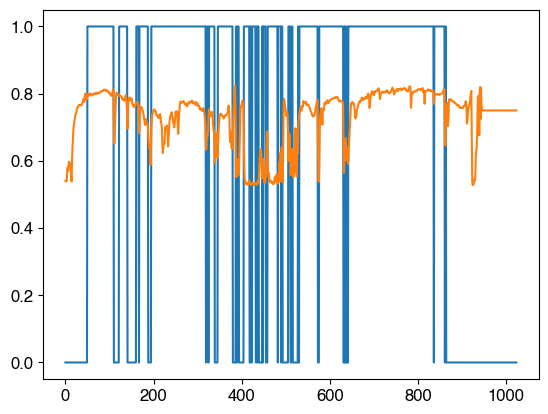

In [104]:
plt.plot(rec_0_psg)
plt.plot(naive_nsr)

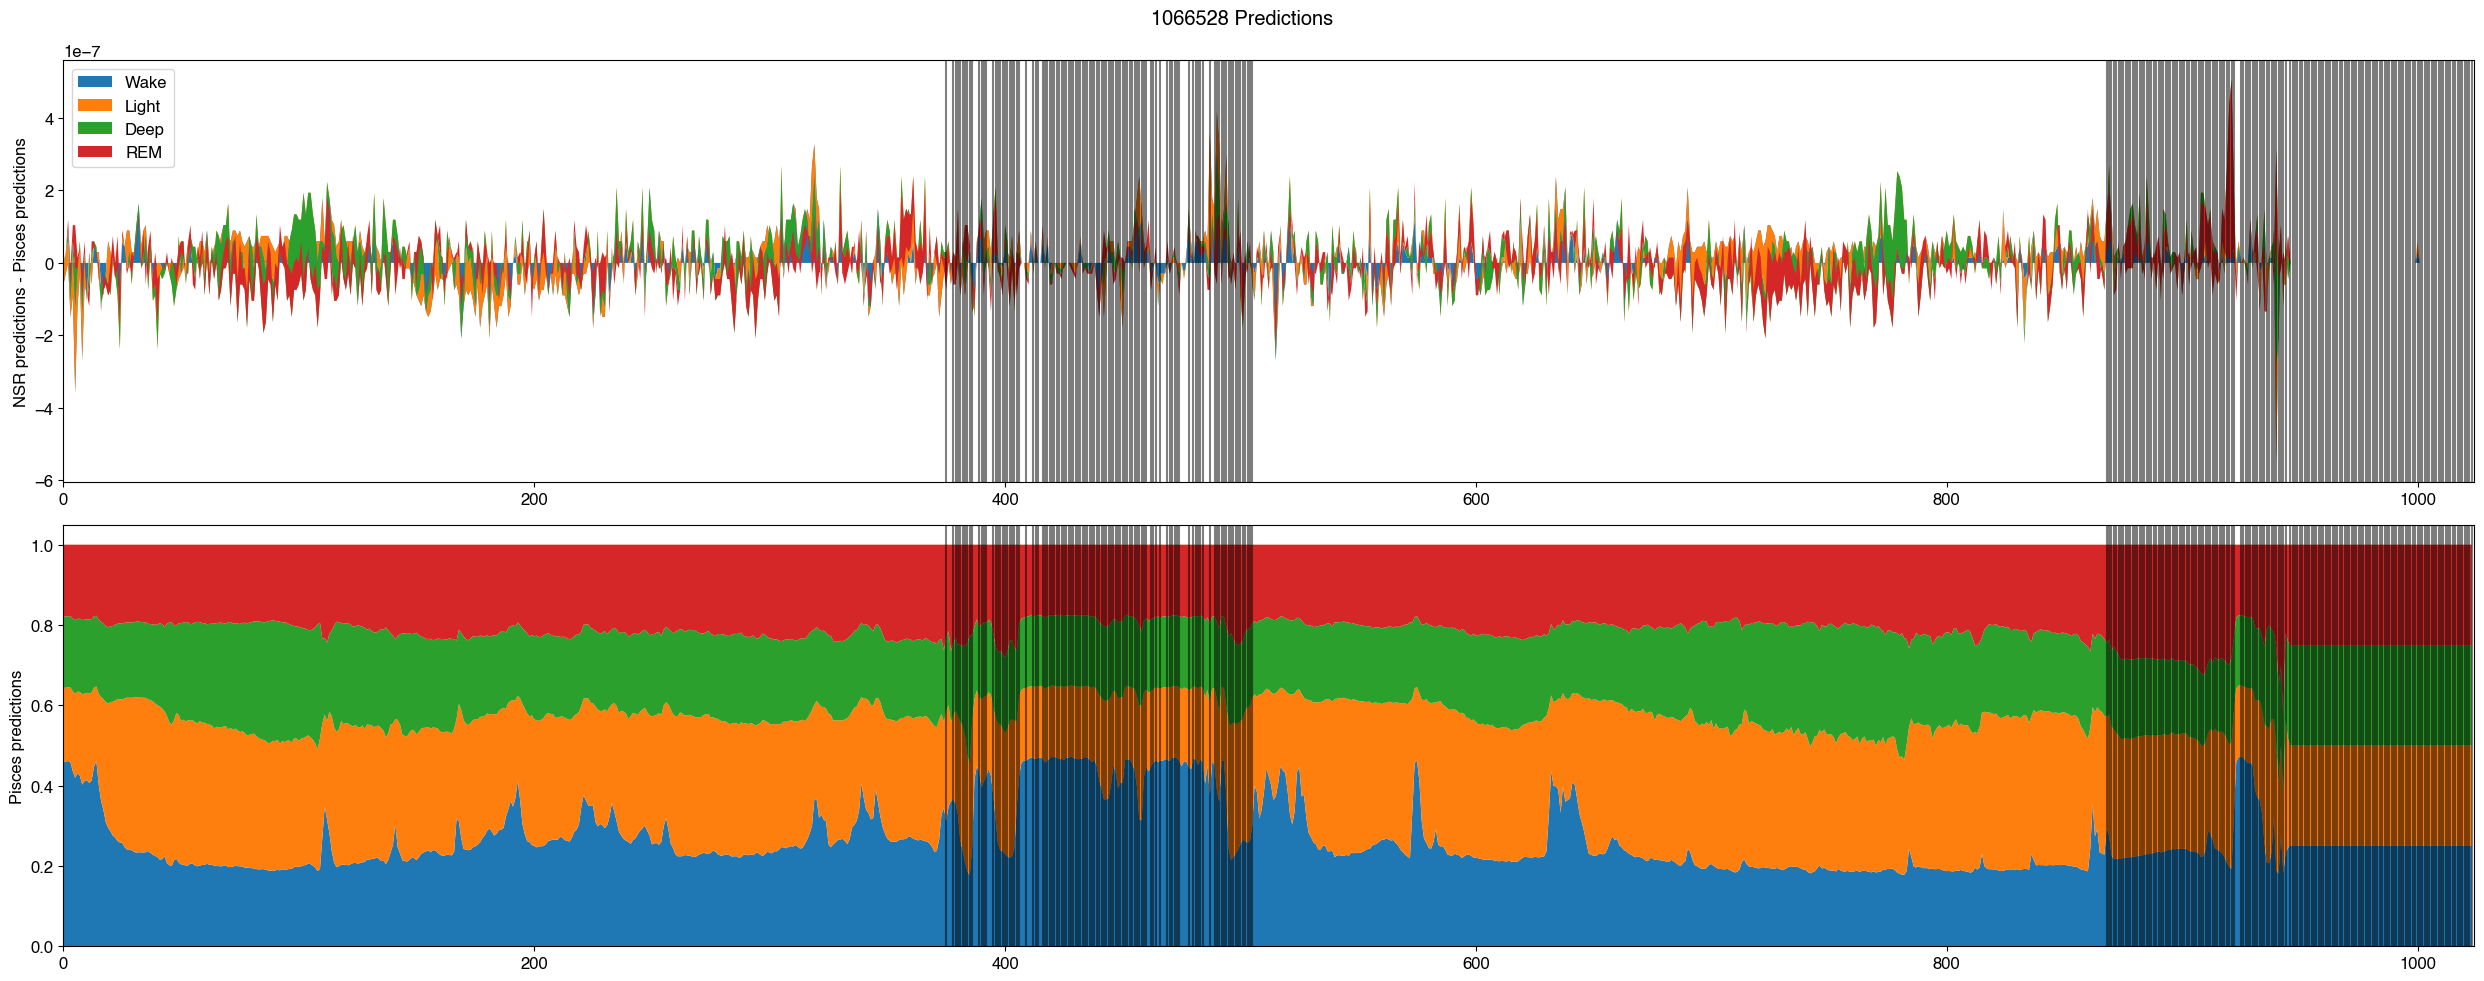

In [67]:
fig, axes = plt.subplots(2, 1, figsize=(25, 10))


axes[0].stackplot(range(1024), softmax_nsr - softmax_pisces, labels=['Wake', 'Light', 'Deep', 'REM'])
axes[0].legend()
axes[0].set_ylabel("NSR predictions - Pisces predictions")
axes[1].stackplot(range(1024), softmax_pisces)
axes[1].set_ylabel("Pisces predictions")
fig.suptitle(f"{walch_keys[0]} Predictions")
fig.tight_layout()

masks = stationary_data_bundle.sample_weights[0] == 0
mask_times = np.where(masks)[0]

for ax in axes:
    ax.set_xlim(0, 1024)
    for mask_time in mask_times:
        ax.axvline(mask_time, color='black', alpha=0.5)

In [75]:
# tf_lite_pisces = tf.lite.TFLiteConverter.from_keras_model(mo).convert()
tf_lite_nsr = tf.lite.Interpreter(model_path='/Users/eric/Engineering/Work/pisces/data_sets/specgrams/resunet.tflite')
# tf_lite_pisces.allocate_tensors()
tf_lite_nsr.allocate_tensors()


In [73]:
def eval_tflite_interp(tflite_model, inputs: np.ndarray) -> np.ndarray:
    # Boilerplate to run inference on a TensorFlow Lite model interpreter.
    input_dets = tflite_model.get_input_details()
    output_dets = tflite_model.get_output_details()

    tflite_model.set_tensor(input_dets[0]["index"], inputs)

    tflite_model.invoke()

    preds = tflite_model.get_tensor(output_dets[0]["index"])

    return preds

In [77]:
# pisces_tf_lite_preds = eval_tflite_interp(tf_lite_pisces, rec_0_input)
nsr_tf_lite_preds = eval_tflite_interp(tf_lite_nsr, np.array(rec_0_input, dtype=np.float32))

# Feed NSR exports into Pisces' MO evaluation loop

## Move NSR exports into bundles

In [13]:
missed_keys = 0
rev_sets_prepro = sets_prepro_data
for key in rev_sets_prepro.keys():
    pisces_prepro = rev_sets_prepro[key]
    nsr_prepro = specgram_data.get(key)

    if nsr_prepro is None:
        print("No NSR data for", key)
        continue

    print("Processing", key)

    for iden in pisces_prepro.keys():
        diff = rev_sets_prepro[key][iden]['spectrogram'] - nsr_prepro[iden]
        # print(f"Diff: [{diff.min()}, {diff.max()}], μ: {diff.mean()}")
        if iden not in nsr_prepro.keys():
            missed_keys += 1
            print("Missing", iden, "from NSR", key)
            continue
        rev_sets_prepro[key][iden]['spectrogram.backup'] = rev_sets_prepro[key][iden]['spectrogram']
        rev_sets_prepro[key][iden]['spectrogram'] = nsr_prepro[iden]
diff = rev_sets_prepro['stationary'][iden]['spectrogram'] - rev_sets_prepro['hybrid'][iden]['spectrogram']
print(f"{iden} Diff: [{diff.min()}, {diff.max()}], μ: {diff.mean()}")
    


Processing stationary
Processing hybrid
9961348 Diff: [-12.228557586669922, 7.592806816101074], μ: 1.9718892574310303


## Evaluations

In [14]:


# rev_sets = reverse_dicts(rev_sets_prepro)
rev_sets = sets_prepro_data

hybrid_preprocessed_data = rev_sets['hybrid']
walch_preprocessed_data = rev_sets['stationary']
hybrid_data_bundle_NSR = prepare_data(hybrid_preprocessed_data)
stationary_data_bundle_NSR = prepare_data(walch_preprocessed_data)

evaluations_df_NSR = compute_evaluations_df(
    walch_keys,
    stationary_data_bundle_NSR,
    hybrid_data_bundle_NSR,
    lr_predictors,
    cnn_predictors
)

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


/Users/eric/Engineering/Work/pisces/analyses/NHRC/nhrc_utils/analysis.py:329: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  evaluations_df = pd.concat([evaluations_df,


In [15]:
from pisces.data_sets import DataSetObject

data_location = Path('/Users/eric/Engineering/Work/pisces/data_sets')

found_sets = DataSetObject.find_data_sets(data_location)
stationary_base = found_sets['walch_et_al']
hybrid_base = found_sets['hybrid_motion']

stationary_base.parse_data_sets()
hybrid_base.parse_data_sets()

In [16]:
s0_id = stationary_base.ids[0]

s0_acc = stationary_base.get_feature_data('accelerometer', s0_id)
h0_acc = hybrid_base.get_feature_data('accelerometer', s0_id)

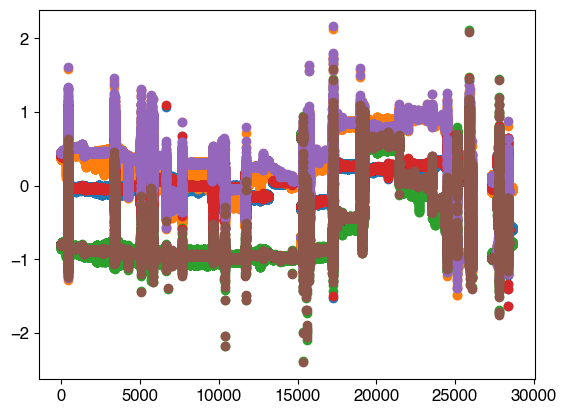

In [17]:
plt.plot(h0_acc[:, 0], h0_acc[:, 1:], 'o')
plt.plot(s0_acc[:, 0], s0_acc[:, 1:], 'o')

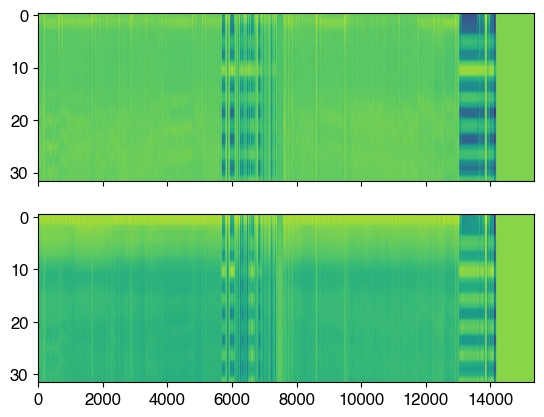

In [18]:
fig, ax = plt.subplots(2, 1, sharex=True)
ax[0].imshow(stationary_data_bundle.spectrogram[0].numpy().T, aspect='auto')
ax[1].imshow(hybrid_data_bundle.spectrogram[0].numpy().T, aspect='auto')

In [19]:
(stationary_data_bundle.mo_predictions[0].numpy().T - hybrid_data_bundle.mo_predictions[0].numpy().T).std()

0.15903114

# It's the spectrograms
Specifically, the accelerometer resampling between NSR and pisces seems to be introducing differences! The Pisces-era eval loop below will discover the same outlier behavior as we saw in NSR.

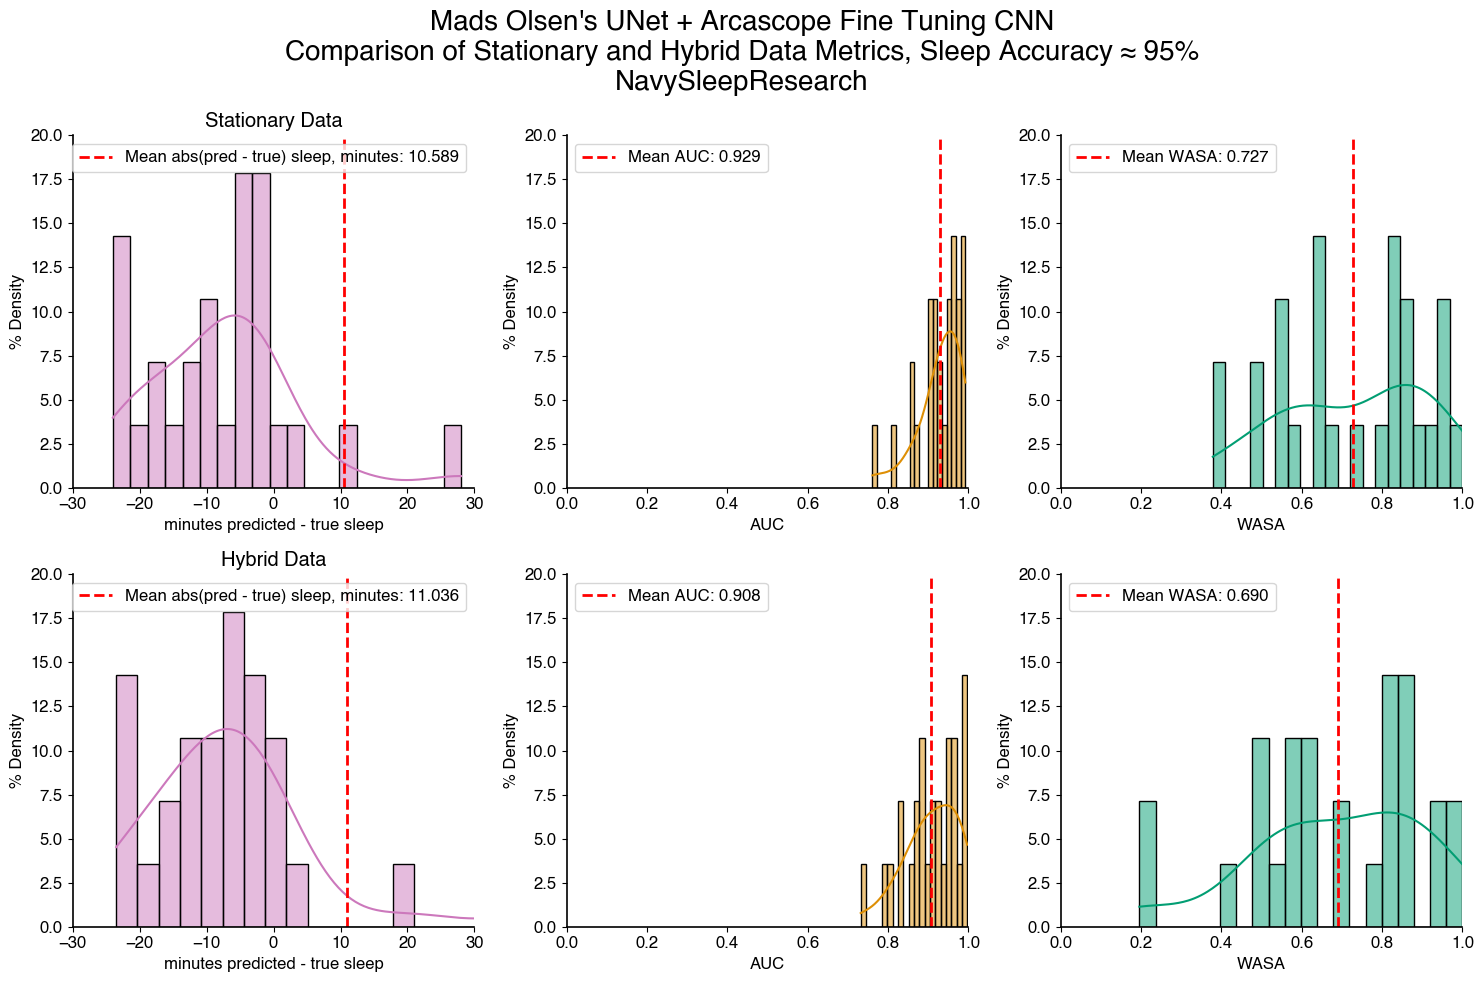

In [20]:

fig, axs = plt.subplots(2, 3, figsize=(15, 10))

cnn_evaluations_df = evaluations_df_NSR[evaluations_df_NSR[MODEL_COLUMN] == EXTRA_LOWER]
cnn_evaluations_df = cnn_evaluations_df[cnn_evaluations_df[SLEEP_ACCURACY_COLUMN] == WASA_SLEEP_PERCENT]
cnn_stationary = cnn_evaluations_df[cnn_evaluations_df[SCENARIO_COLUMN] == STATIONARY_LOWER]
cnn_hybrid = cnn_evaluations_df[cnn_evaluations_df[SCENARIO_COLUMN] == HYBRID_LOWER]

for ax in axs.flatten():
    ax.set_ylim(0, 20)

tri_plot_metrics(evaluations_df=cnn_stationary, axs=axs[0], axs_set_name=STATIONARY_SET_NAME,
                 wasa_column=WASA_COLUMN, accuracy_column=ACCURACY_COLUMN, auroc_column=AUROC_COLUMN)
tri_plot_metrics(cnn_hybrid, axs=axs[1], axs_set_name=HYBRID_SET_NAME,
                 wasa_column=WASA_COLUMN, accuracy_column=ACCURACY_COLUMN, auroc_column=AUROC_COLUMN)


fig.suptitle(f"Mads Olsen's UNet + Arcascope {EXTRA_LAYERS_NAME} CNN\n{SECOND_TITLE_LINE}\nNavySleepResearch", fontsize=20)

fig.tight_layout()
fig.savefig(DEFAULT_EVALUATION_DIR.joinpath(f"{EXTRA_LOWER}_triplot_{WASA_SLEEP_PERCENT}_NSR.png"), dpi=TRIPLOT_DPI, bbox_inches='tight')

In [23]:
evaluations_df_NSR.head()

,test_id,scenario,model,AUROC,TST_Error,WASA,threshold,sleep_accuracy
0,1066528,stationary,naive,0.748840,26.0,0.321429,0.651811,93
1,1066528,stationary,naive,0.748840,33.5,0.300000,0.633294,95
2,1066528,stationary,naive,0.748840,47.0,0.192857,0.589139,97
3,1066528,stationary,finetuning,0.761162,15.5,0.464286,0.324737,93
4,1066528,stationary,finetuning,0.761162,28.0,0.378571,0.196593,95


In [24]:
evaluations_df_NSR[(evaluations_df_NSR['test_id'] == '1066528') & (evaluations_df_NSR['scenario'] == 'stationary') & (evaluations_df_NSR['sleep_accuracy'] == 93)]

,test_id,scenario,model,AUROC,TST_Error,WASA,threshold,sleep_accuracy
0,1066528,stationary,naive,0.748840,26.0,0.321429,0.651811,93
3,1066528,stationary,finetuning,0.761162,15.5,0.464286,0.324737,93
6,1066528,stationary,lr,0.714435,22.5,0.371429,0.373632,93


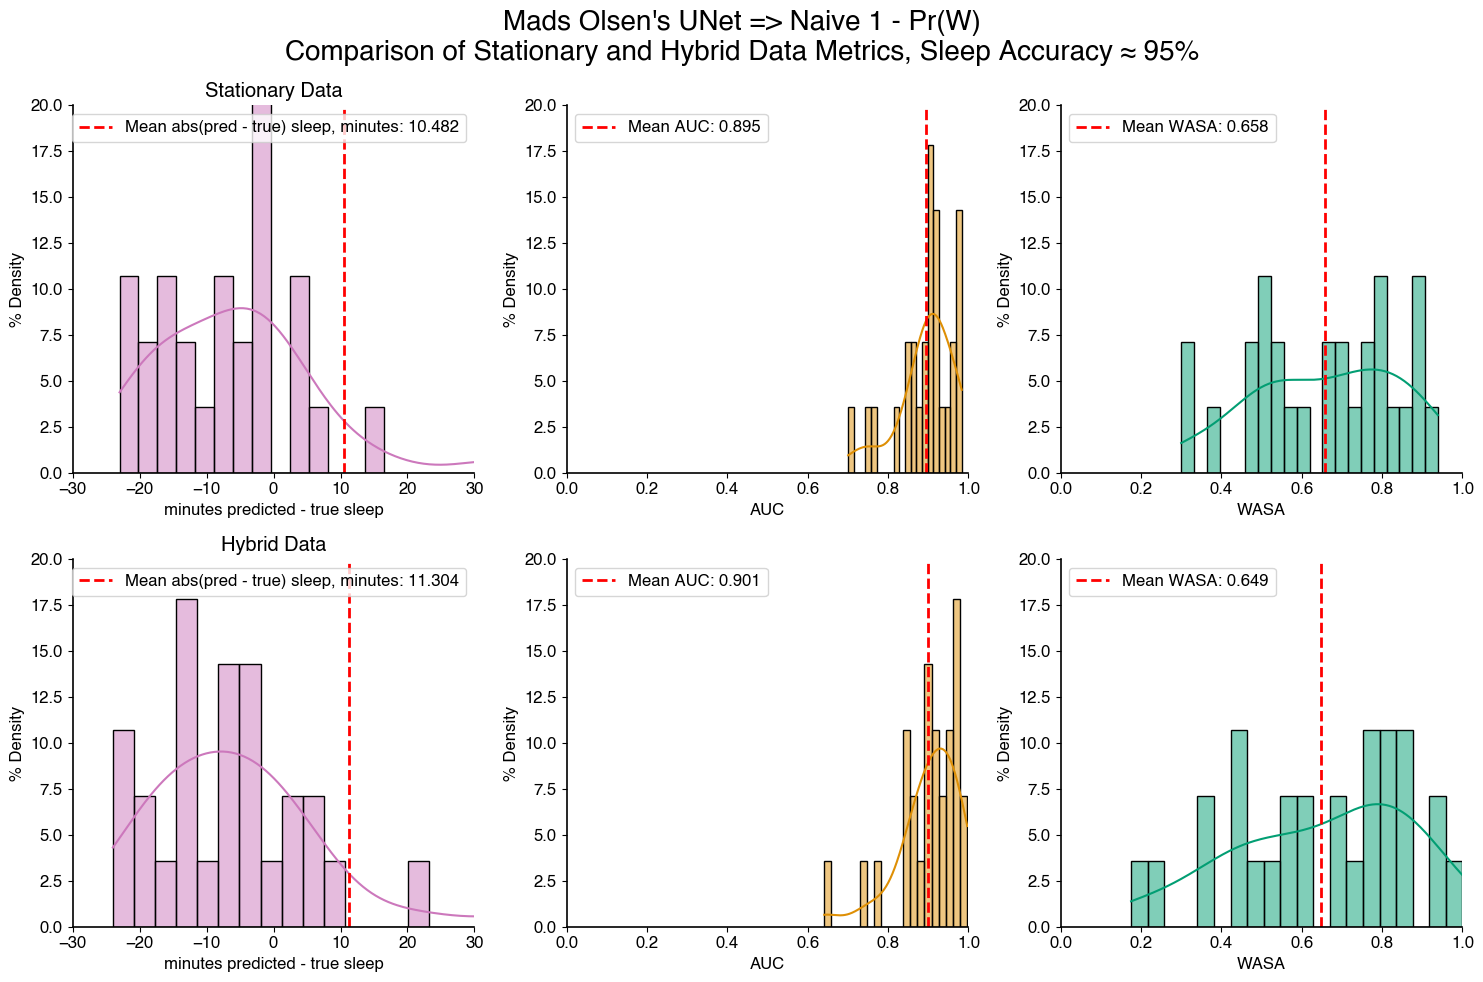

In [21]:


fig, axs = plt.subplots(2, 3, figsize=(15, 10))

naive_evaluations_df = evaluations_df_NSR[evaluations_df_NSR[MODEL_COLUMN] == NAIVE_LOWER]
naive_evaluations_df = naive_evaluations_df[naive_evaluations_df[SLEEP_ACCURACY_COLUMN] == WASA_SLEEP_PERCENT]
naive_stationary = naive_evaluations_df[naive_evaluations_df[SCENARIO_COLUMN] == STATIONARY_LOWER]
naive_hybrid = naive_evaluations_df[naive_evaluations_df[SCENARIO_COLUMN] == HYBRID_LOWER]

tri_plot_metrics(naive_stationary, axs=axs[0], axs_set_name=STATIONARY_SET_NAME, 
                 wasa_column=WASA_COLUMN, accuracy_column=ACCURACY_COLUMN, auroc_column=AUROC_COLUMN)
tri_plot_metrics(naive_hybrid, axs=axs[1], axs_set_name=HYBRID_SET_NAME, 
                 wasa_column=WASA_COLUMN, accuracy_column=ACCURACY_COLUMN, auroc_column=AUROC_COLUMN)
for ax in axs.flatten():
    ax.set_ylim(0, 20)

fig.suptitle(f"Mads Olsen's UNet => Naive 1 - Pr(W)\n{SECOND_TITLE_LINE}", fontsize=20)

fig.tight_layout()
fig.savefig(DEFAULT_EVALUATION_DIR.joinpath(f"{NAIVE_LOWER}_triplot_{WASA_SLEEP_PERCENT}_NSR.png"), dpi=TRIPLOT_DPI, bbox_inches='tight')

## Tri plot for logistic regression CNN

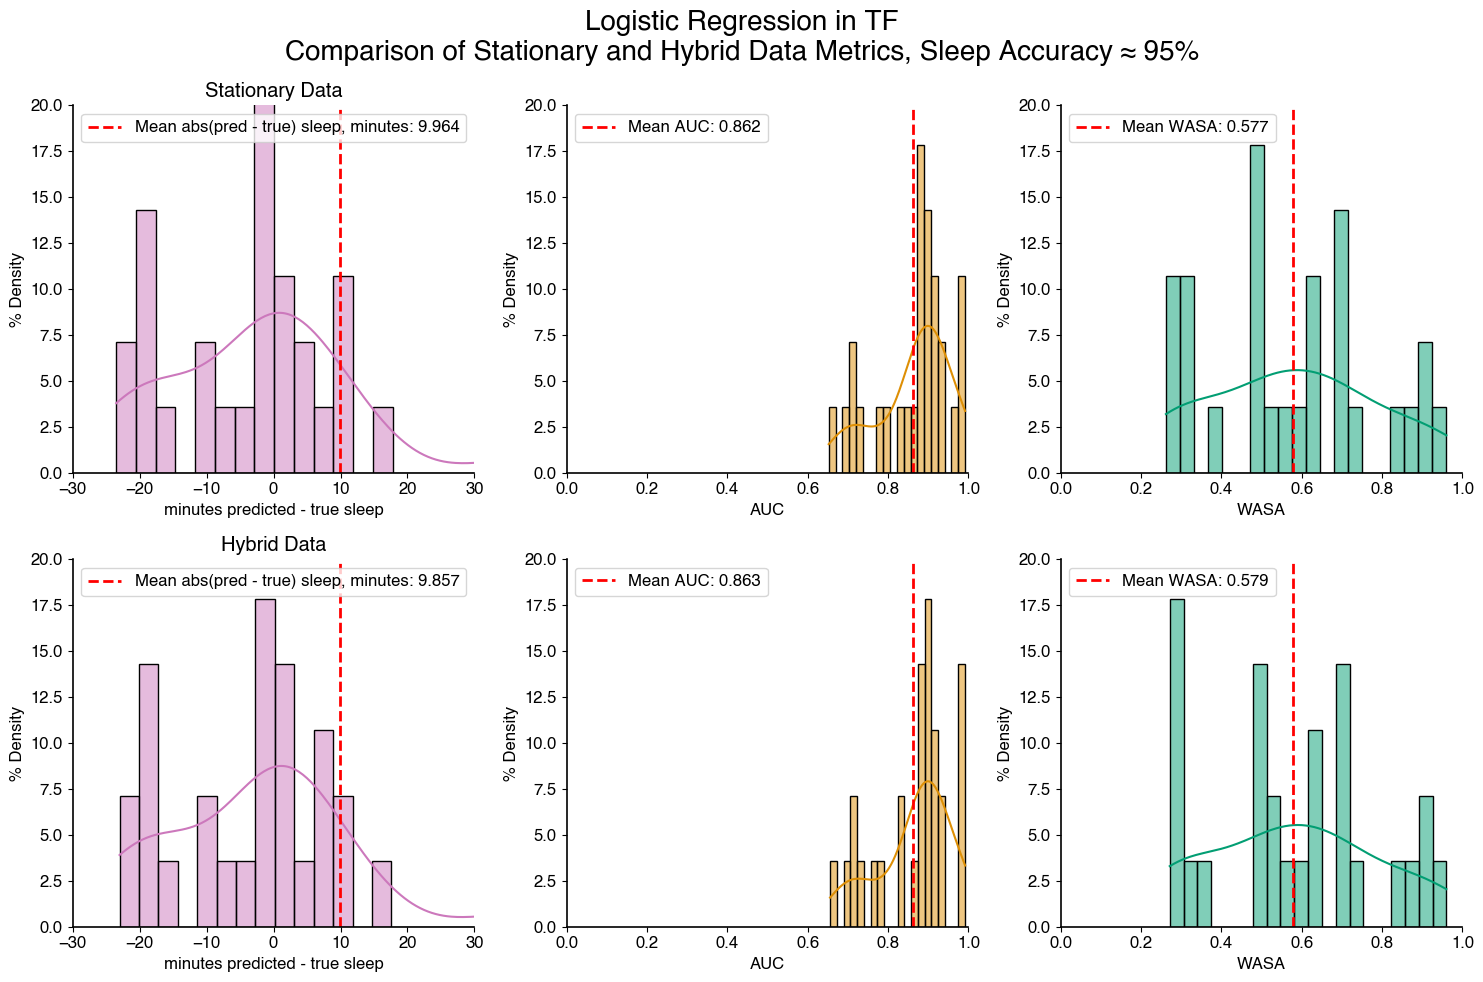

In [22]:
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

lr_evaluations_df = evaluations_df[evaluations_df[MODEL_COLUMN] == LR_LOWER]
lr_evaluations_df = lr_evaluations_df[lr_evaluations_df[SLEEP_ACCURACY_COLUMN] == WASA_SLEEP_PERCENT]
lr_stationary = lr_evaluations_df[lr_evaluations_df[SCENARIO_COLUMN] == STATIONARY_LOWER]
lr_hybrid = lr_evaluations_df[lr_evaluations_df[SCENARIO_COLUMN] == HYBRID_LOWER]

tri_plot_metrics(lr_stationary, axs=axs[0], axs_set_name=STATIONARY_SET_NAME,
                 wasa_column=WASA_COLUMN, accuracy_column=ACCURACY_COLUMN, auroc_column=AUROC_COLUMN)
tri_plot_metrics(lr_hybrid, axs=axs[1], axs_set_name=HYBRID_SET_NAME,
                 wasa_column=WASA_COLUMN, accuracy_column=ACCURACY_COLUMN, auroc_column=AUROC_COLUMN)

for ax in axs.flatten():
    ax.set_ylim(0, 20)

fig.suptitle(f"Logistic Regression in TF\n{SECOND_TITLE_LINE}", fontsize=20)

fig.tight_layout()
fig.savefig(DEFAULT_EVALUATION_DIR.joinpath(f"{LR_LOWER}_triplot_{WASA_SLEEP_PERCENT}.png"), dpi=TRIPLOT_DPI, bbox_inches='tight')